## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- **Objective:** Identify key factors that affect student performance in exams.

- **Target Variables:** Math, Reading, and Writing Scores.

- **Independent Variables:** Gender, Ethnicity, Parental Education Level, Lunch Type, and Test Preparation.unch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- Dataset Overview:

    - Total Rows: 1000

    - Total Columns: 8

    - Features:

        - gender (Male/Female)

        - race/ethnicity (Group A to E)

        - parental level of education

        - lunch (Standard/Free or Reduced)

        - test preparation course (Completed/None)

        - math score, reading score, writing score (Numerical)



### 2.1 Import Data

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings


%matplotlib inline
warnings.filterwarnings('ignore')

#### 2.1.1 Import the CSV Data as Pandas DataFrame

In [7]:
df = pd.read_csv('../data/rawData.csv')

#### 2.1.2 Show Top 5 Records

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### 2.1.3 Shape of the dataset

In [11]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race_ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental_level_of_education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test_preparation_course : complete or not complete before test
- math_score
- reading_score
- writing_score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [16]:
print(df.isnull().sum())  # Shows count of missing values per column

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


#### There are no missing values in the data set

In [18]:
# df.dropna(inplace=True)  # Remove rows with missing value

### 3.2 Check Duplicates

In [20]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


#### There are no duplicates  values in the data set

In [22]:
# df.drop_duplicates(inplace=True)

### 3.3 Check data types

In [24]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [25]:
print(df.dtypes)

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object


### 3.4 Checking the number of unique values of each column

In [27]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [29]:
df.describe()  # For numerical data

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [30]:
df.describe(include="object")  # For categorical data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [33]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [34]:
categorical_columns = [
    "gender",
    "race_ethnicity",
    "parental_level_of_education",
    "lunch",
    "test_preparation_course"
]

for col in categorical_columns:
    print(f"Categories in '{col}': {df[col].unique()}")


Categories in 'gender': ['female' 'male']
Categories in 'race_ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch': ['standard' 'free/reduced']
Categories in 'test_preparation_course': ['none' 'completed']


In [35]:
# Define numerical & categorical columns
numeric_features = df.select_dtypes(exclude=['object']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Print results
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"\nWe have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [36]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding columns for "Total Score" and "Average"

In [38]:
# Compute total and average scores
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3  # Ensure float division

# Display first few rows
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [39]:
# Count students with full marks in each subject
full_marks_counts = {
    "Maths": (df["math_score"] == 100).sum(),
    "Writing": (df["writing_score"] == 100).sum(),
    "Reading": (df["reading_score"] == 100).sum(),
}

# Print results
for subject, count in full_marks_counts.items():
    print(f"Number of students with full marks in {subject}: {count}")

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [40]:
# Count students scoring ≤ 20 in each subject
low_score_counts = {
    "Maths": (df["math_score"] <= 20).sum(),
    "Writing": (df["writing_score"] <= 20).sum(),
    "Reading": (df["reading_score"] <= 20).sum(),
}

# Print results
for subject, count in low_score_counts.items():
    print(f"Number of students with ≤ 20 marks in {subject}: {count}")

Number of students with ≤ 20 marks in Maths: 4
Number of students with ≤ 20 marks in Writing: 3
Number of students with ≤ 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram and Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

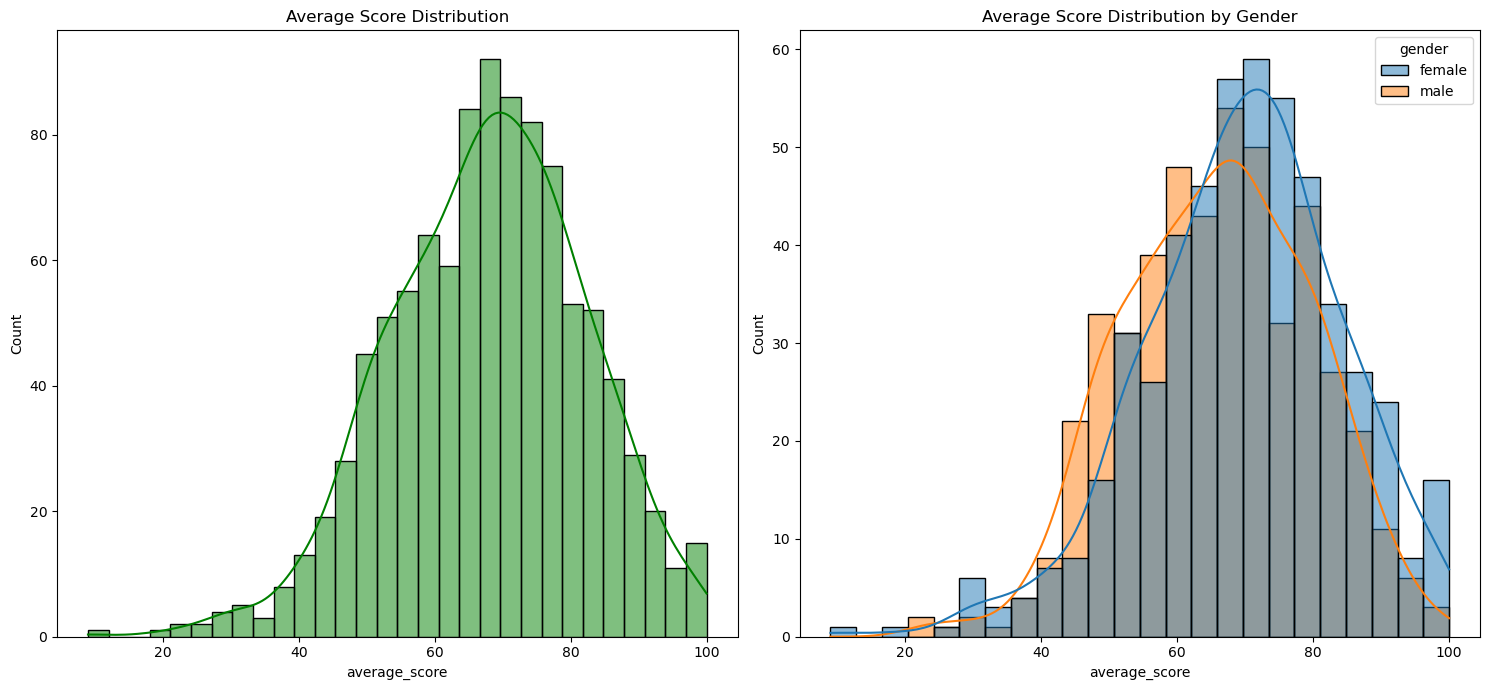

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Histogram with KDE (Single Distribution)
sns.histplot(data=df, x="average_score", bins=30, kde=True, color="g", ax=axs[0])
axs[0].set_title("Average Score Distribution")

# Histogram with KDE (Gender-wise Distribution)
sns.histplot(data=df, x="average_score", kde=True, hue="gender", ax=axs[1])
axs[1].set_title("Average Score Distribution by Gender")

plt.tight_layout()
plt.show()


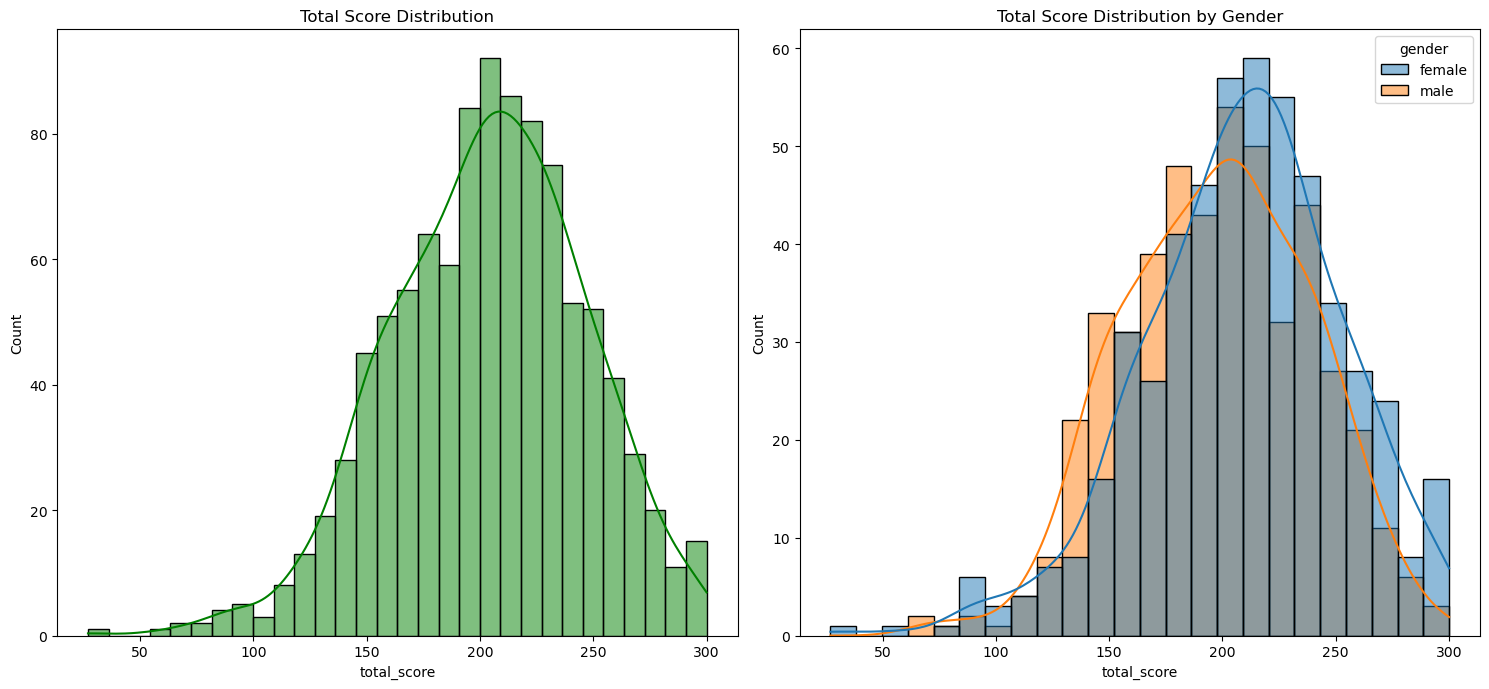

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Histogram with KDE (Overall Distribution)
sns.histplot(data=df, x="total_score", bins=30, kde=True, color="g", ax=axs[0])
axs[0].set_title("Total Score Distribution")

# Histogram with KDE (Gender-wise Distribution)
sns.histplot(data=df, x="total_score", kde=True, hue="gender", ax=axs[1])
axs[1].set_title("Total Score Distribution by Gender")

plt.tight_layout()
plt.show()

#####  Insights
- Female students tend to perform well then male students.

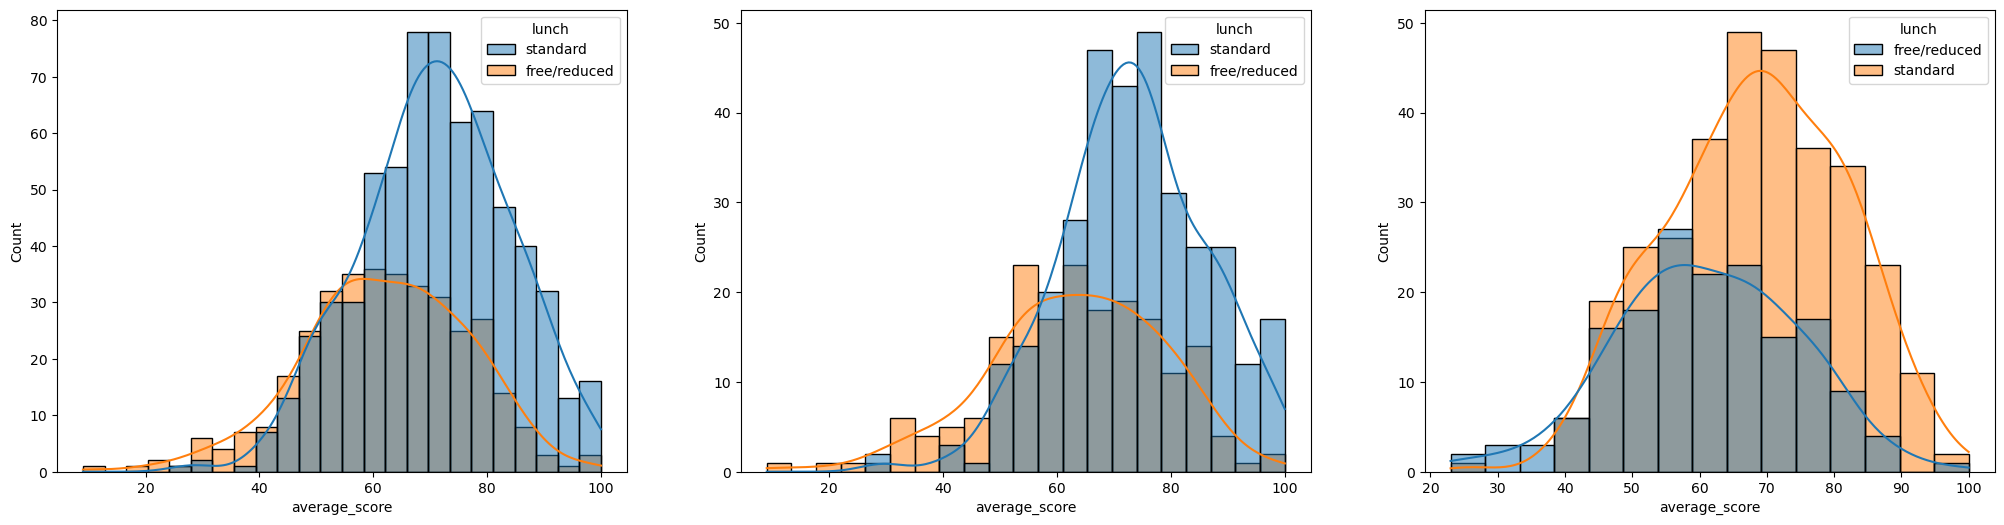

In [47]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)

sns.histplot(data=df, x='average_score', kde=True, hue='lunch')
plt.subplot(132)

sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='lunch')
plt.subplot(133)

sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='lunch')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

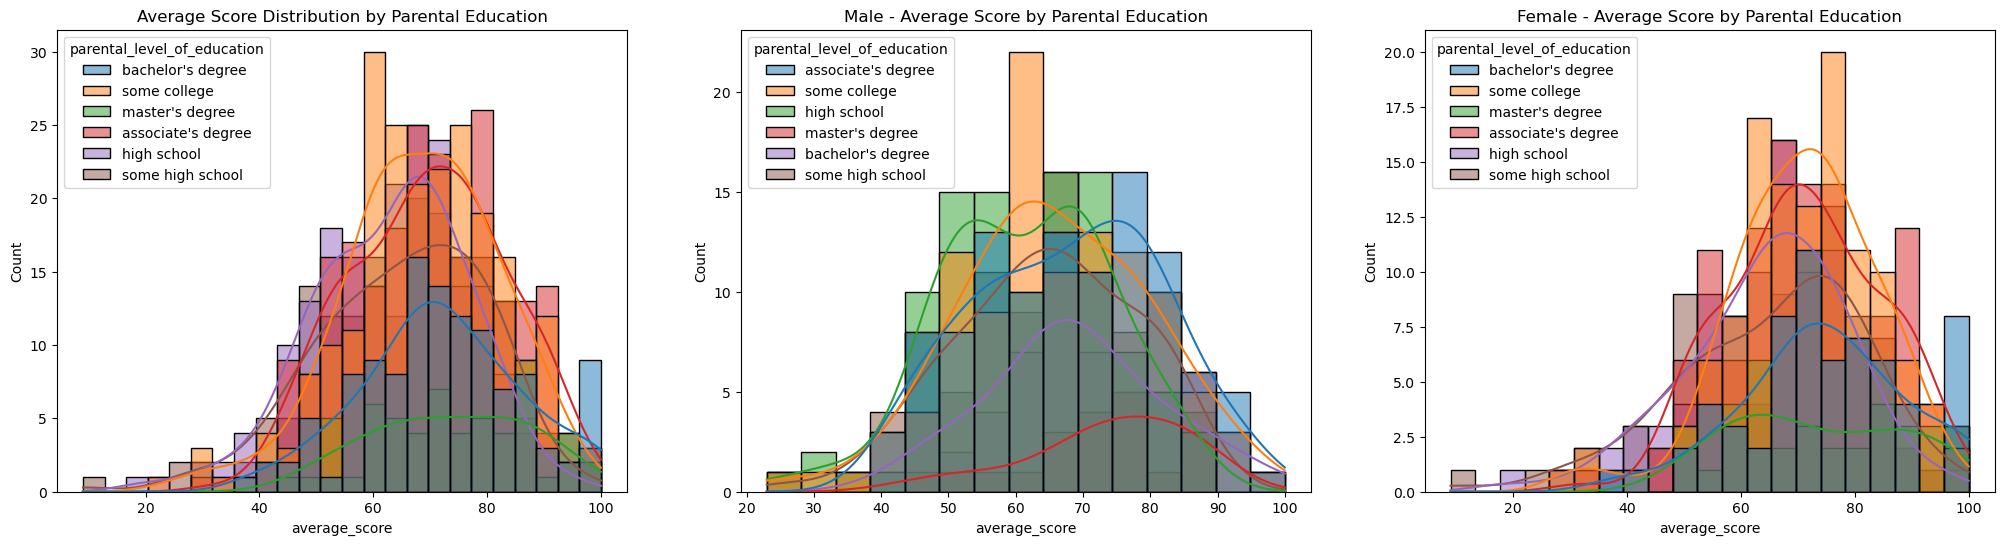

In [49]:
plt.figure(figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='parental_level_of_education')
plt.title("Average Score Distribution by Parental Education")

plt.subplot(132)
sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='parental_level_of_education')
plt.title("Male - Average Score by Parental Education")

plt.subplot(133)
sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='parental_level_of_education')
plt.title("Female - Average Score by Parental Education")

plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

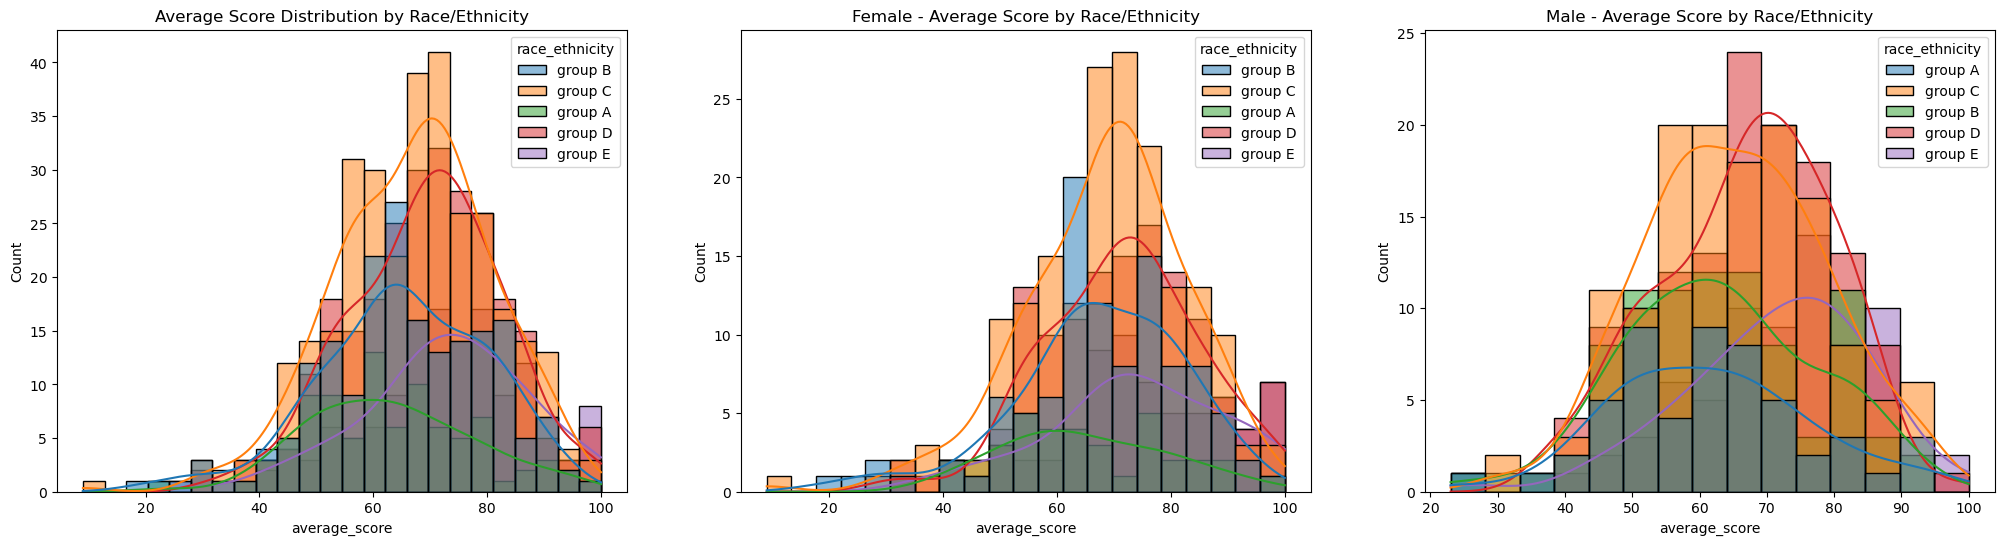

In [51]:
plt.figure(figsize=(25, 6))

# Plot 1: Overall Average Score Distribution by Race/Ethnicity
plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='race_ethnicity')
plt.title("Average Score Distribution by Race/Ethnicity")

# Plot 2: Female Average Score Distribution by Race/Ethnicity
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='race_ethnicity')
plt.title("Female - Average Score by Race/Ethnicity")

# Plot 3: Male Average Score Distribution by Race/Ethnicity
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='race_ethnicity')
plt.title("Male - Average Score by Race/Ethnicity")

plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

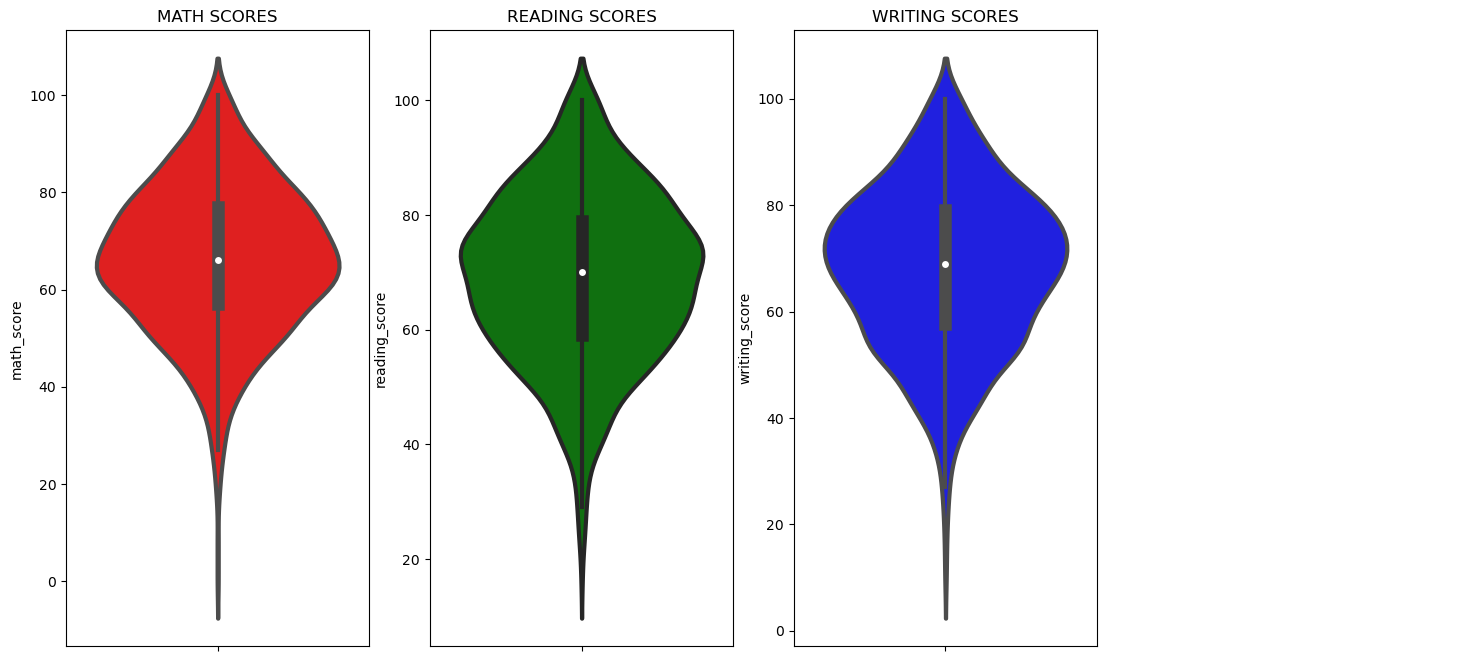

In [54]:
plt.figure(figsize=(18, 8))

# Math Score Violin Plot
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)

# Reading Score Violin Plot
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)

# Writing Score Violin Plot
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)

plt.subplot(1, 4, 4)  # Extra subplot for better layout
plt.axis("off")  # Hide the last subplot (Optional)

plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

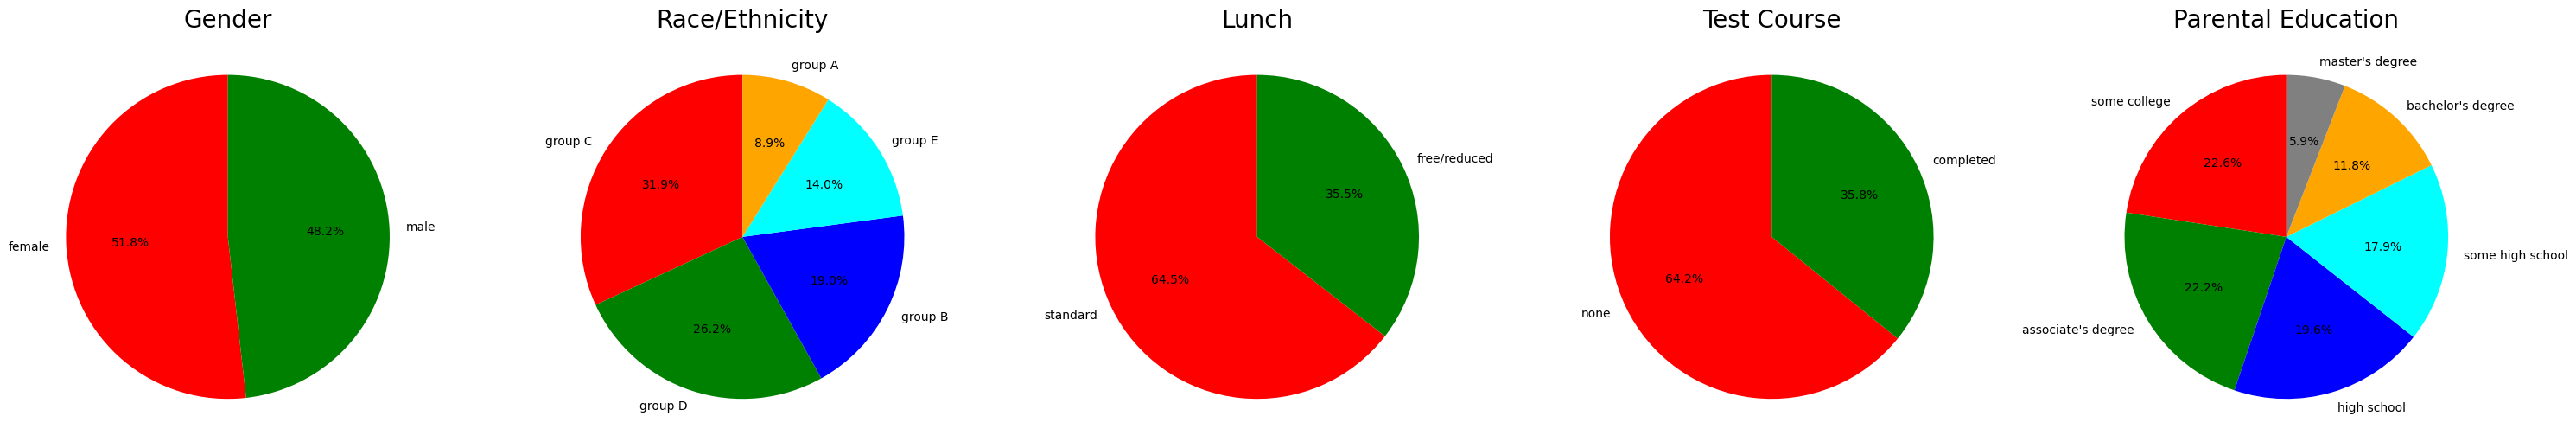

In [57]:
plt.rcParams['figure.figsize'] = (30, 12)

# Gender Distribution
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = size.index  # Get dynamic labels
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Gender', fontsize=20)
plt.axis('off')

# Race/Ethnicity Distribution
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()  # Fixed column name
labels = size.index  # Get labels dynamically
colors = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

# Lunch Distribution
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = size.index
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Test Preparation Course
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = size.index
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Test Course', fontsize=20)
plt.axis('off')

# Parental Education Level
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = size.index
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

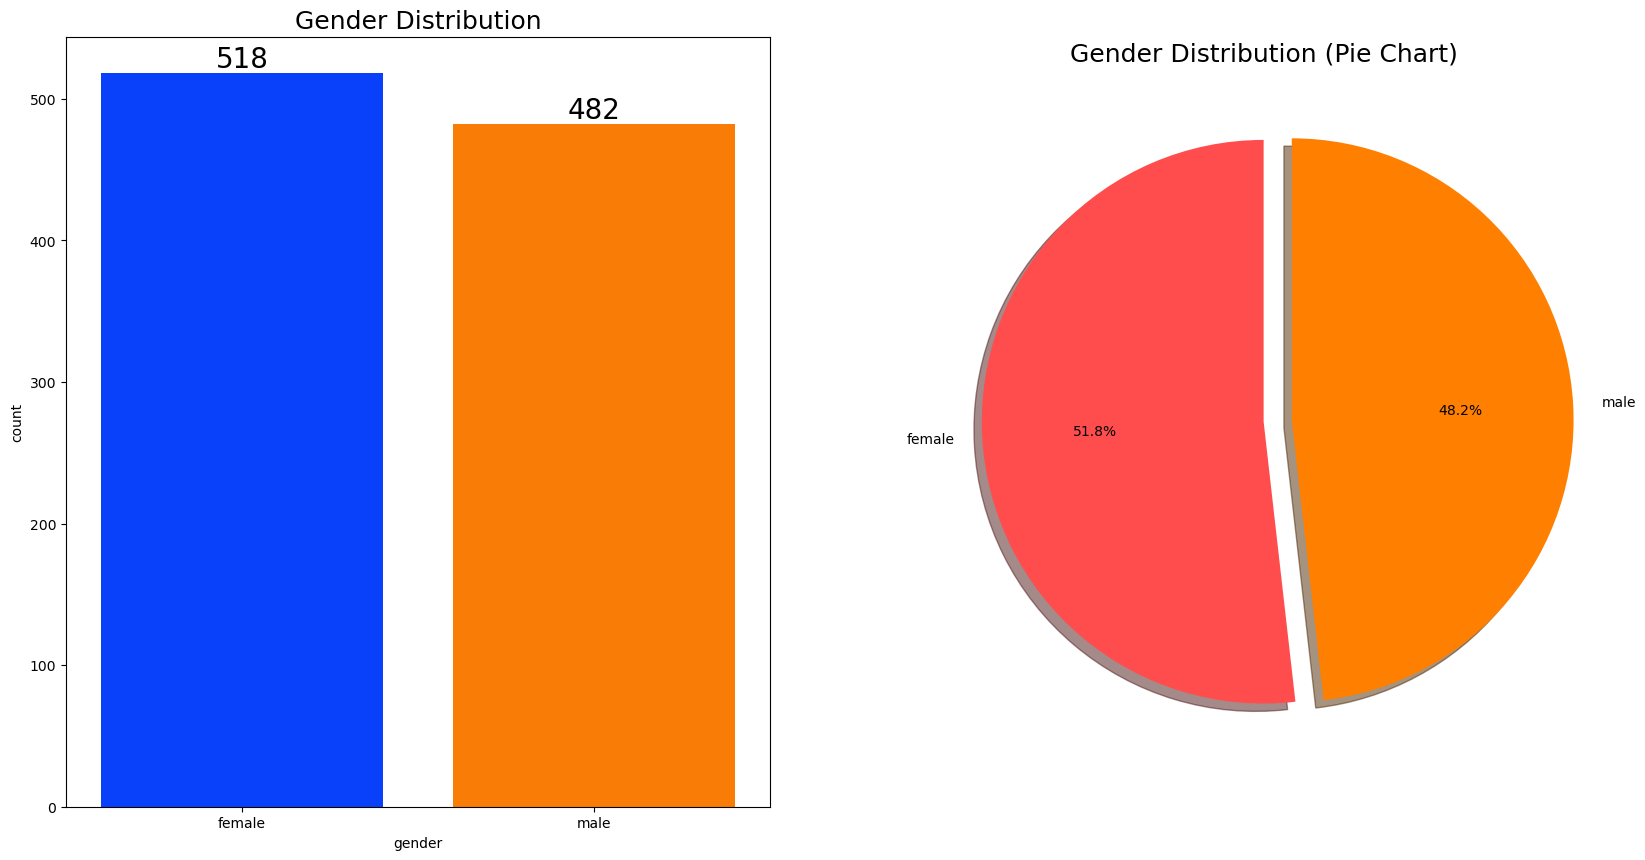

In [61]:
# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot for gender distribution
sns.countplot(x='gender', data=df, palette='bright', ax=ax[0], saturation=0.95)

# Adding bar labels
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

ax[0].set_title('Gender Distribution', fontsize=18)

# Pie chart for gender distribution
gender_counts = df['gender'].value_counts()  # Get dynamic counts
ax[1].pie(
    x=gender_counts,
    labels=gender_counts.index,  # Use dynamic labels
    explode=[0, 0.1],  # Highlight one slice
    autopct='%1.1f%%',
    shadow=True,
    colors=['#ff4d4d', '#ff8000'],
    startangle=90
)

ax[1].set_title('Gender Distribution (Pie Chart)', fontsize=18)

plt.show()


#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [64]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


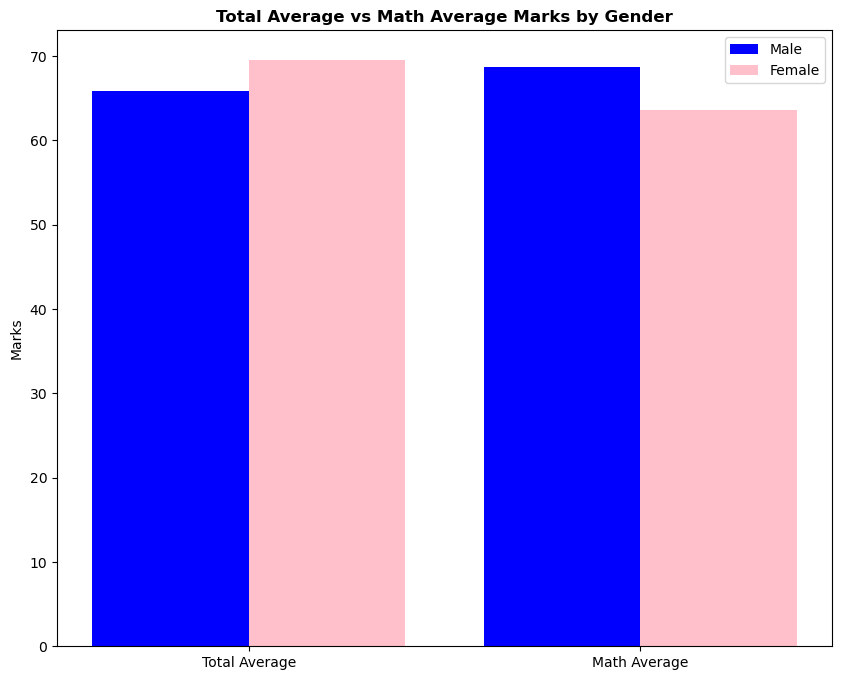

In [65]:
# Group by gender and calculate mean
gender_group = df.groupby('gender').mean(numeric_only=True)

plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

# Ensure gender_group is properly indexed
female_scores = [gender_group.loc['female', 'average_score'], gender_group.loc['female', 'math_score']]
male_scores = [gender_group.loc['male', 'average_score'], gender_group.loc['male', 'math_score']]

X_axis = np.arange(len(X))

# Grouped bar chart
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male', color='blue')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female', color='pink')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average vs Math Average Marks by Gender", fontweight='bold')

plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

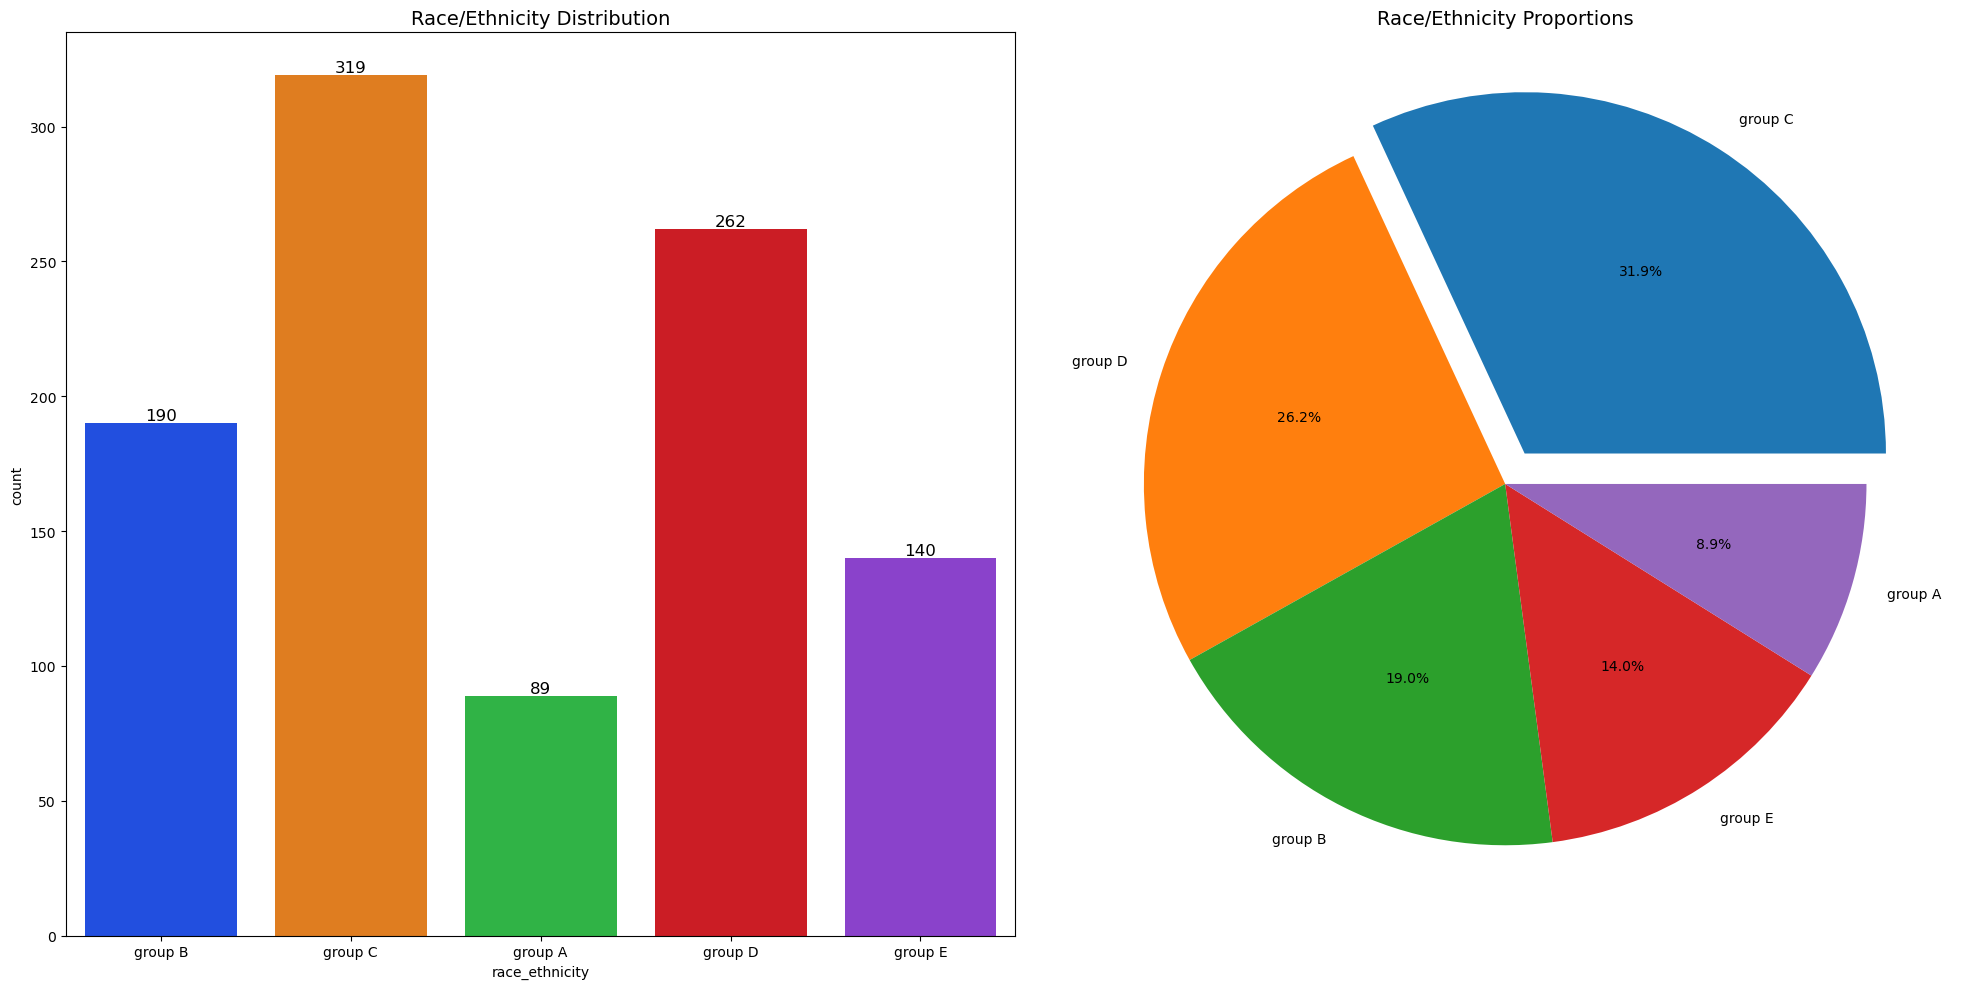

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot for Race/Ethnicity Distribution
sns.countplot(x='race_ethnicity', data=df, palette='bright', ax=ax[0])
ax[0].set_title('Race/Ethnicity Distribution', fontsize=14)

# Corrected way to add bar labels
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%d', color='black', size=12)

# Pie Chart for Race/Ethnicity Proportions
df['race_ethnicity'].value_counts().plot.pie(
    autopct='%1.1f%%', explode=[0.1, 0, 0, 0, 0], ax=ax[1], shadow=False
)
ax[1].set_title('Race/Ethnicity Proportions', fontsize=14)
ax[1].set_ylabel('')  # Hide y-label for better visualization

plt.tight_layout()
plt.show()

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

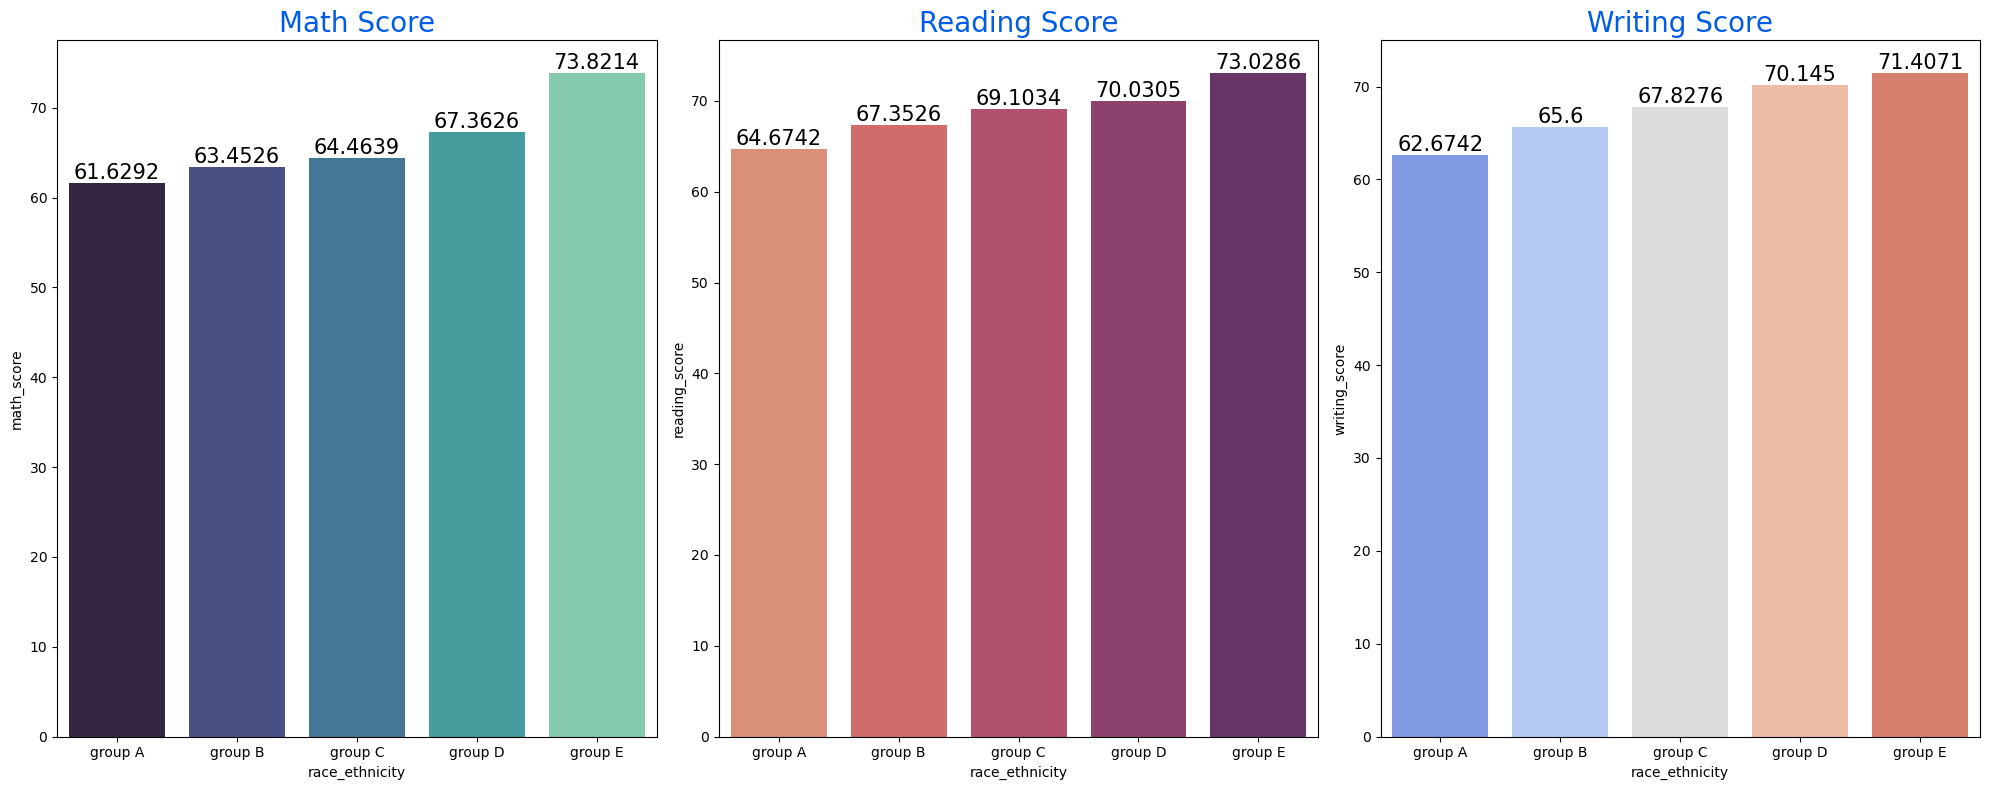

In [72]:
# Compute mean scores by race/ethnicity
grouped_means = df.groupby('race_ethnicity').mean(numeric_only=True)

# Set up figure and axes
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Define score types and palettes
score_types = ['math_score', 'reading_score', 'writing_score']
palettes = ['mako', 'flare', 'coolwarm']
titles = ['Math Score', 'Reading Score', 'Writing Score']

# Iterate over subplots
for i, (score, palette, title) in enumerate(zip(score_types, palettes, titles)):
    sns.barplot(x=grouped_means.index, y=grouped_means[score], palette=palette, ax=axes[i])
    axes[i].set_title(title, color='#005ce6', size=20)
    # Add bar labels
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

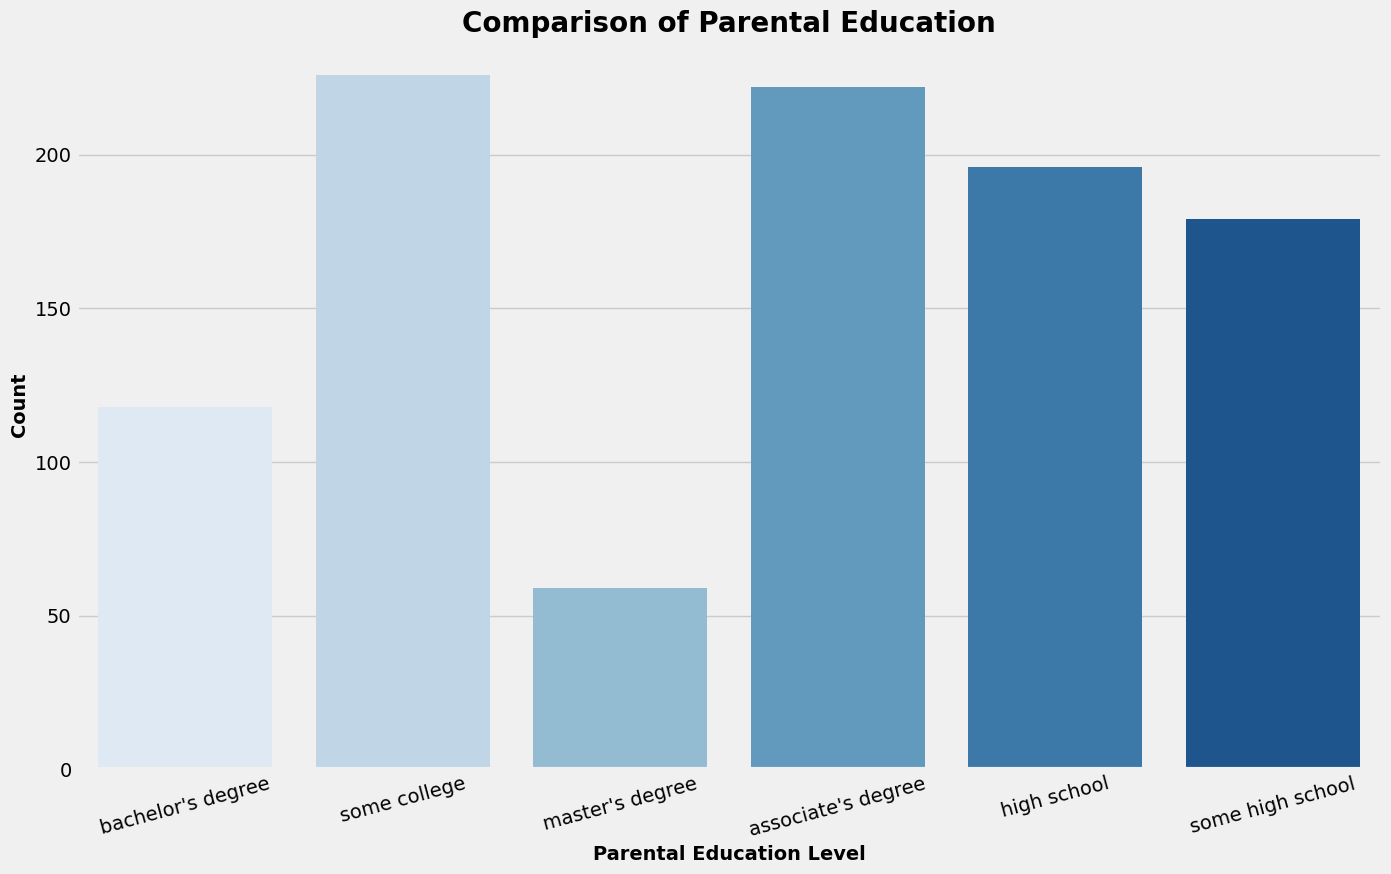

In [76]:
# Set figure size globally
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Seaborn count plot
sns.countplot(x='parental_level_of_education', data=df, palette='Blues')

# Title and labels
plt.title('Comparison of Parental Education', fontweight='bold', fontsize=20)
plt.xlabel('Parental Education Level', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=15)

# Show the plot
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

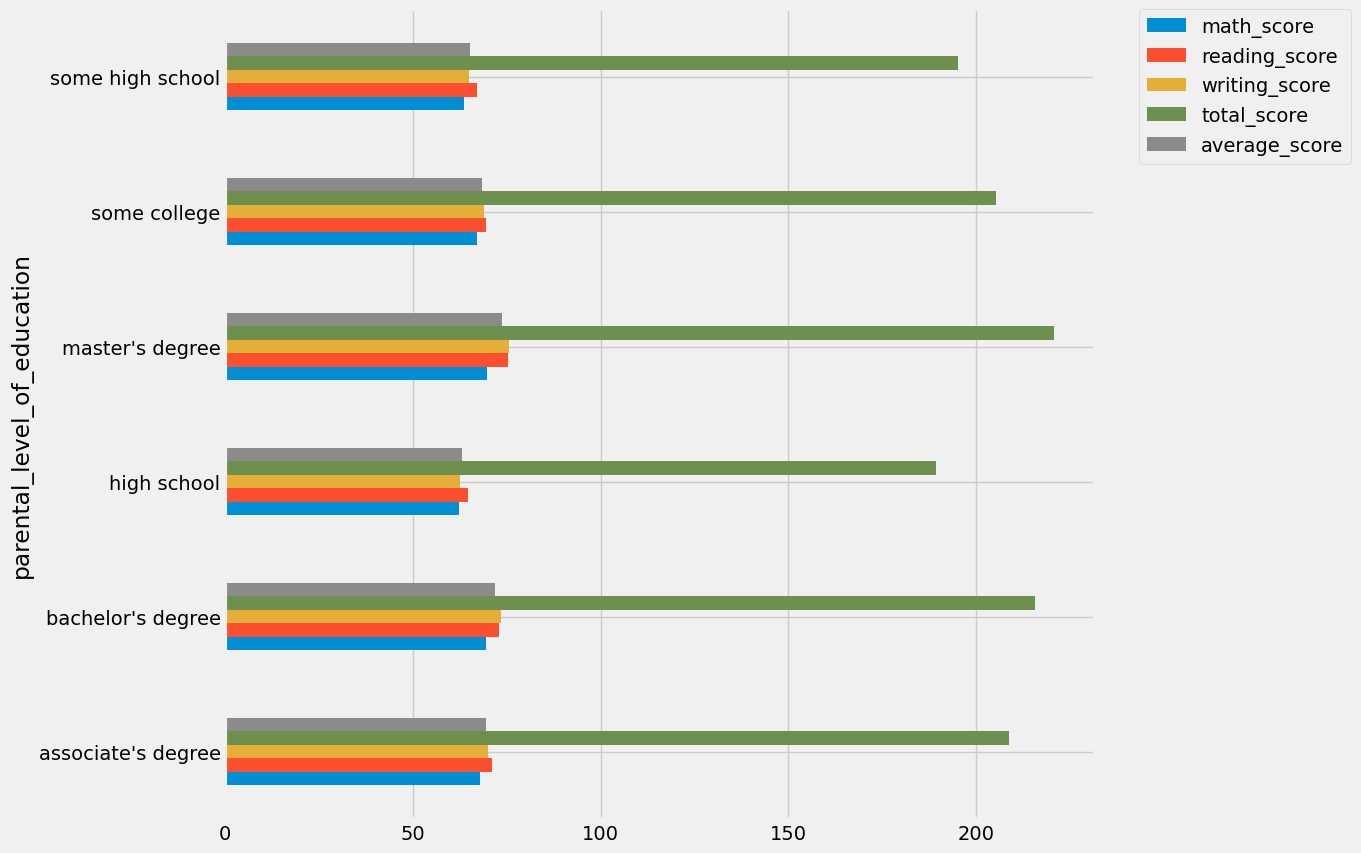

In [79]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

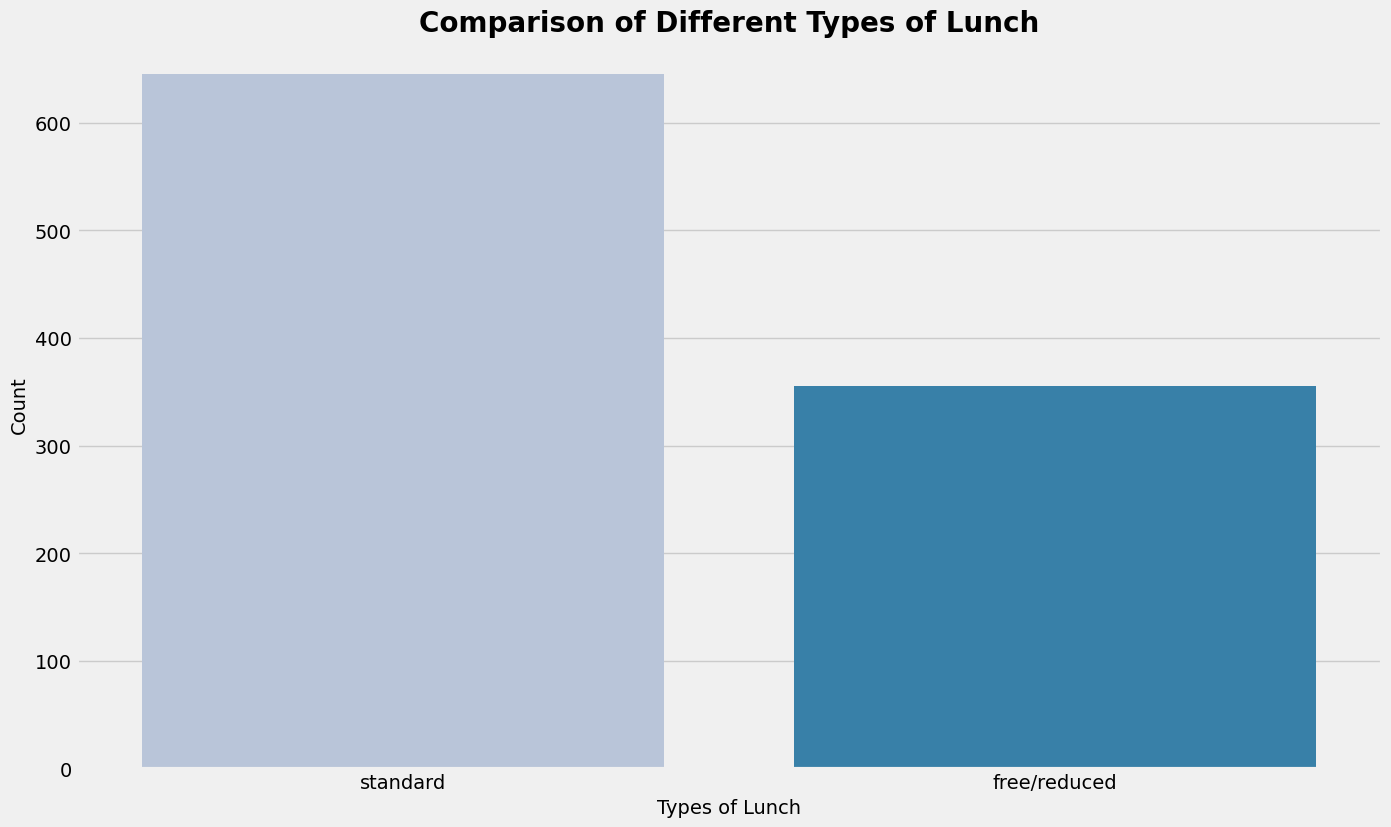

In [83]:
plt.rcParams['figure.figsize'] = (15, 9)

sns.countplot(x='lunch', data=df, palette='PuBu')

plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

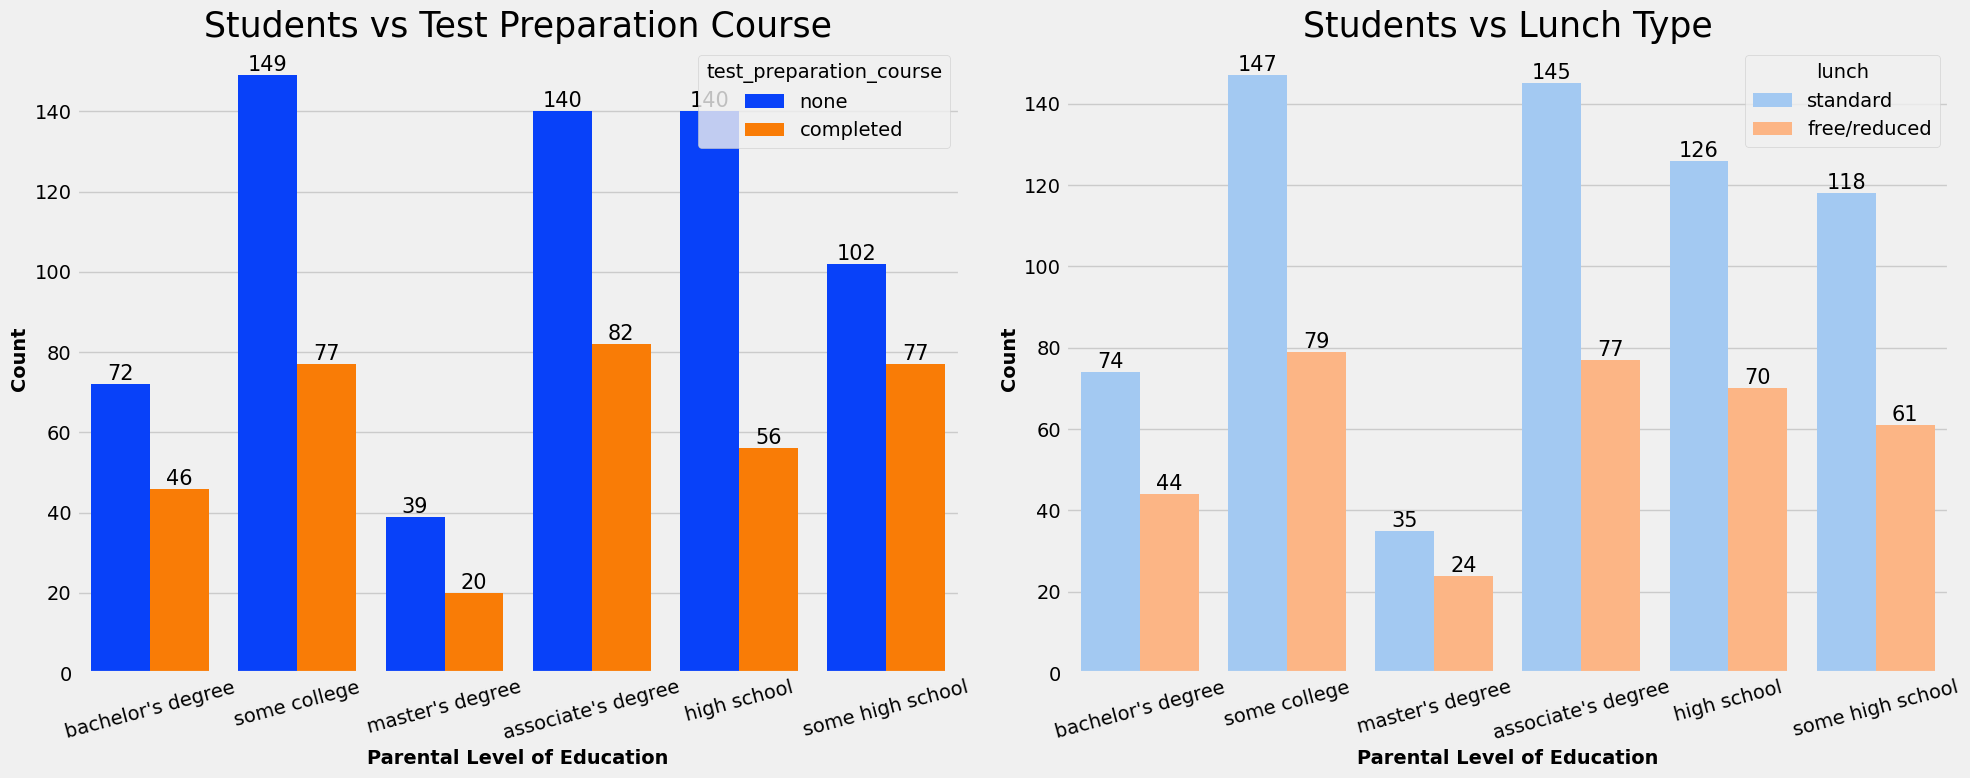

In [86]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# First Countplot - Test Preparation Course
sns.countplot(x='parental_level_of_education', data=df, palette='bright',
              hue='test_preparation_course', saturation=0.95, ax=ax[0])

ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)
ax[0].set_xlabel('Parental Level of Education', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Count', fontsize=14, fontweight='bold')
ax[0].tick_params(axis='x', rotation=15)

# Add bar labels
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Second Countplot - Lunch
sns.countplot(x='parental_level_of_education', data=df, palette='pastel', 
              hue='lunch', saturation=0.95, ax=ax[1])

ax[1].set_title('Students vs Lunch Type', color='black', size=25)
ax[1].set_xlabel('Parental Level of Education', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Count', fontsize=14, fontweight='bold')
ax[1].tick_params(axis='x', rotation=15)

# Add bar labels
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Show plot
plt.tight_layout()
plt.show()

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

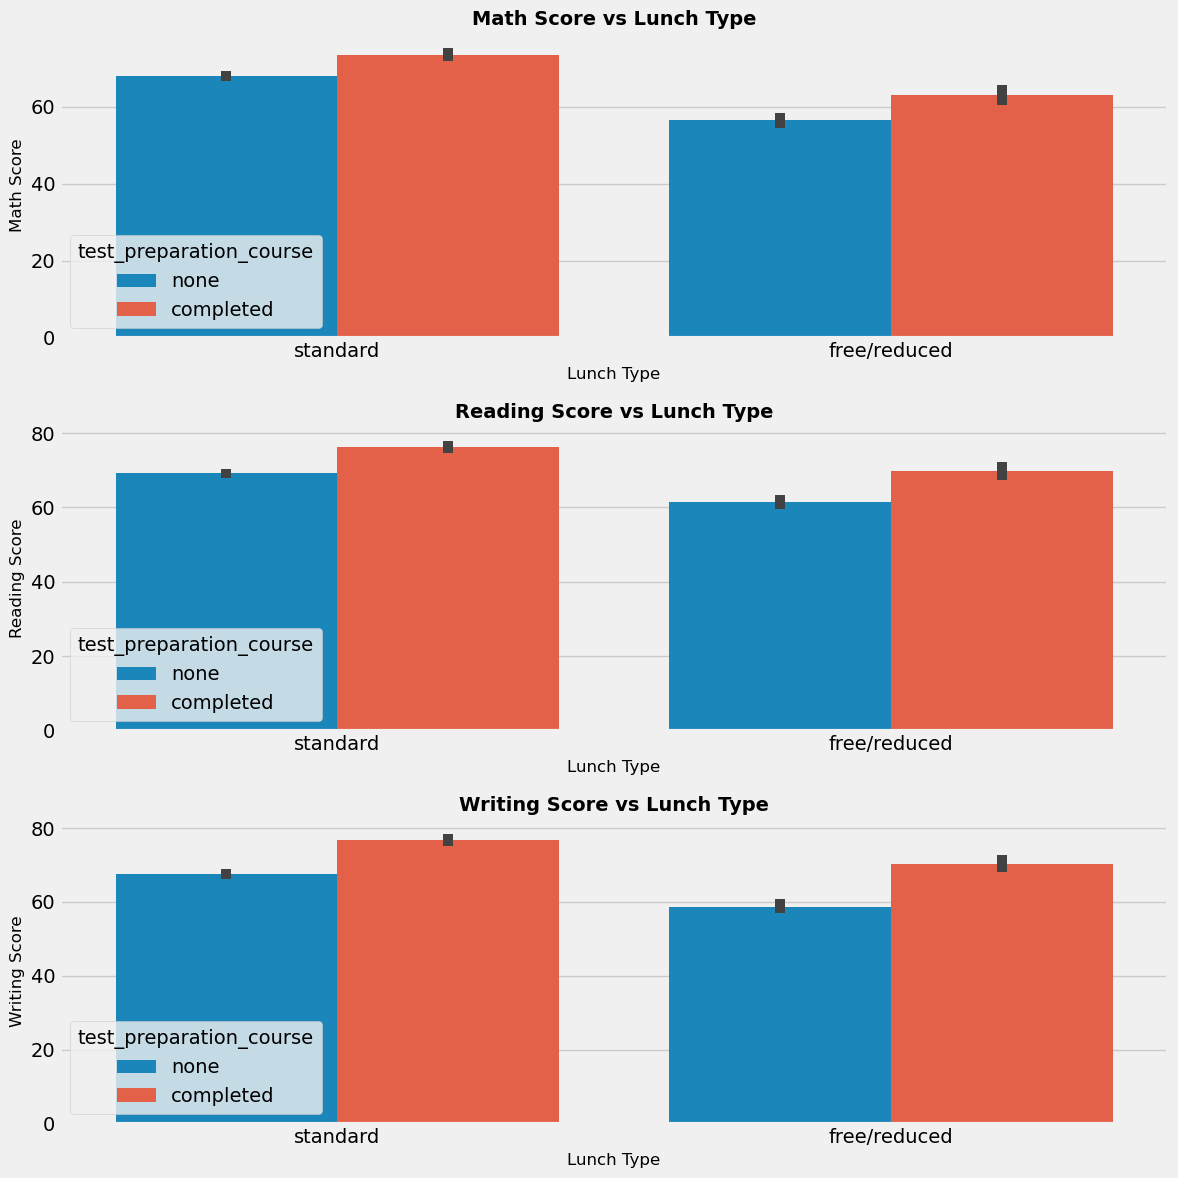

In [90]:
# Set figure size
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

# Math Score
sns.barplot(x='lunch', y='math_score', hue='test_preparation_course', data=df, ax=ax[0])
ax[0].set_title('Math Score vs Lunch Type', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Lunch Type', fontsize=12)
ax[0].set_ylabel('Math Score', fontsize=12)

# Reading Score
sns.barplot(x='lunch', y='reading_score', hue='test_preparation_course', data=df, ax=ax[1])
ax[1].set_title('Reading Score vs Lunch Type', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Lunch Type', fontsize=12)
ax[1].set_ylabel('Reading Score', fontsize=12)

# Writing Score
sns.barplot(x='lunch', y='writing_score', hue='test_preparation_course', data=df, ax=ax[2])
ax[2].set_title('Writing Score vs Lunch Type', fontsize=14, fontweight='bold')
ax[2].set_xlabel('Lunch Type', fontsize=12)
ax[2].set_ylabel('Writing Score', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

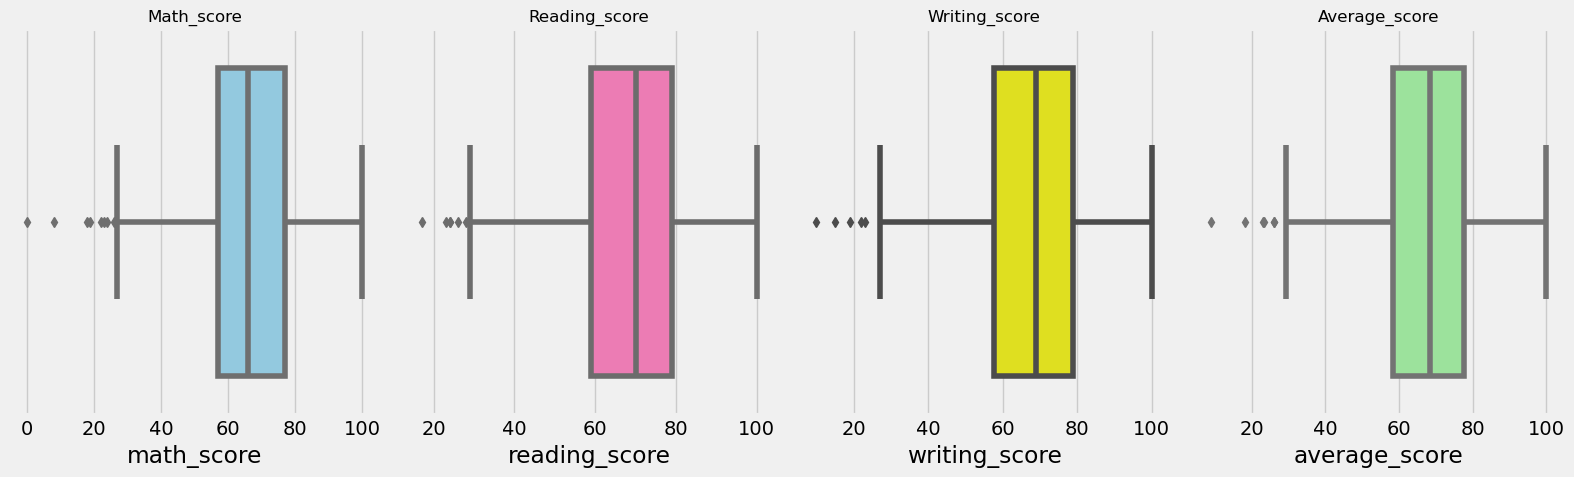

In [93]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

# Define score labels and colors
score_columns = ['math_score', 'reading_score', 'writing_score', 'average_score']
colors = ['skyblue', 'hotpink', 'yellow', 'lightgreen']

for i, (col, color) in enumerate(zip(score_columns, colors)):
    sns.boxplot(x=df[col], color=color, ax=axes[i])
    axes[i].set_title(col.capitalize(), fontsize=12)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

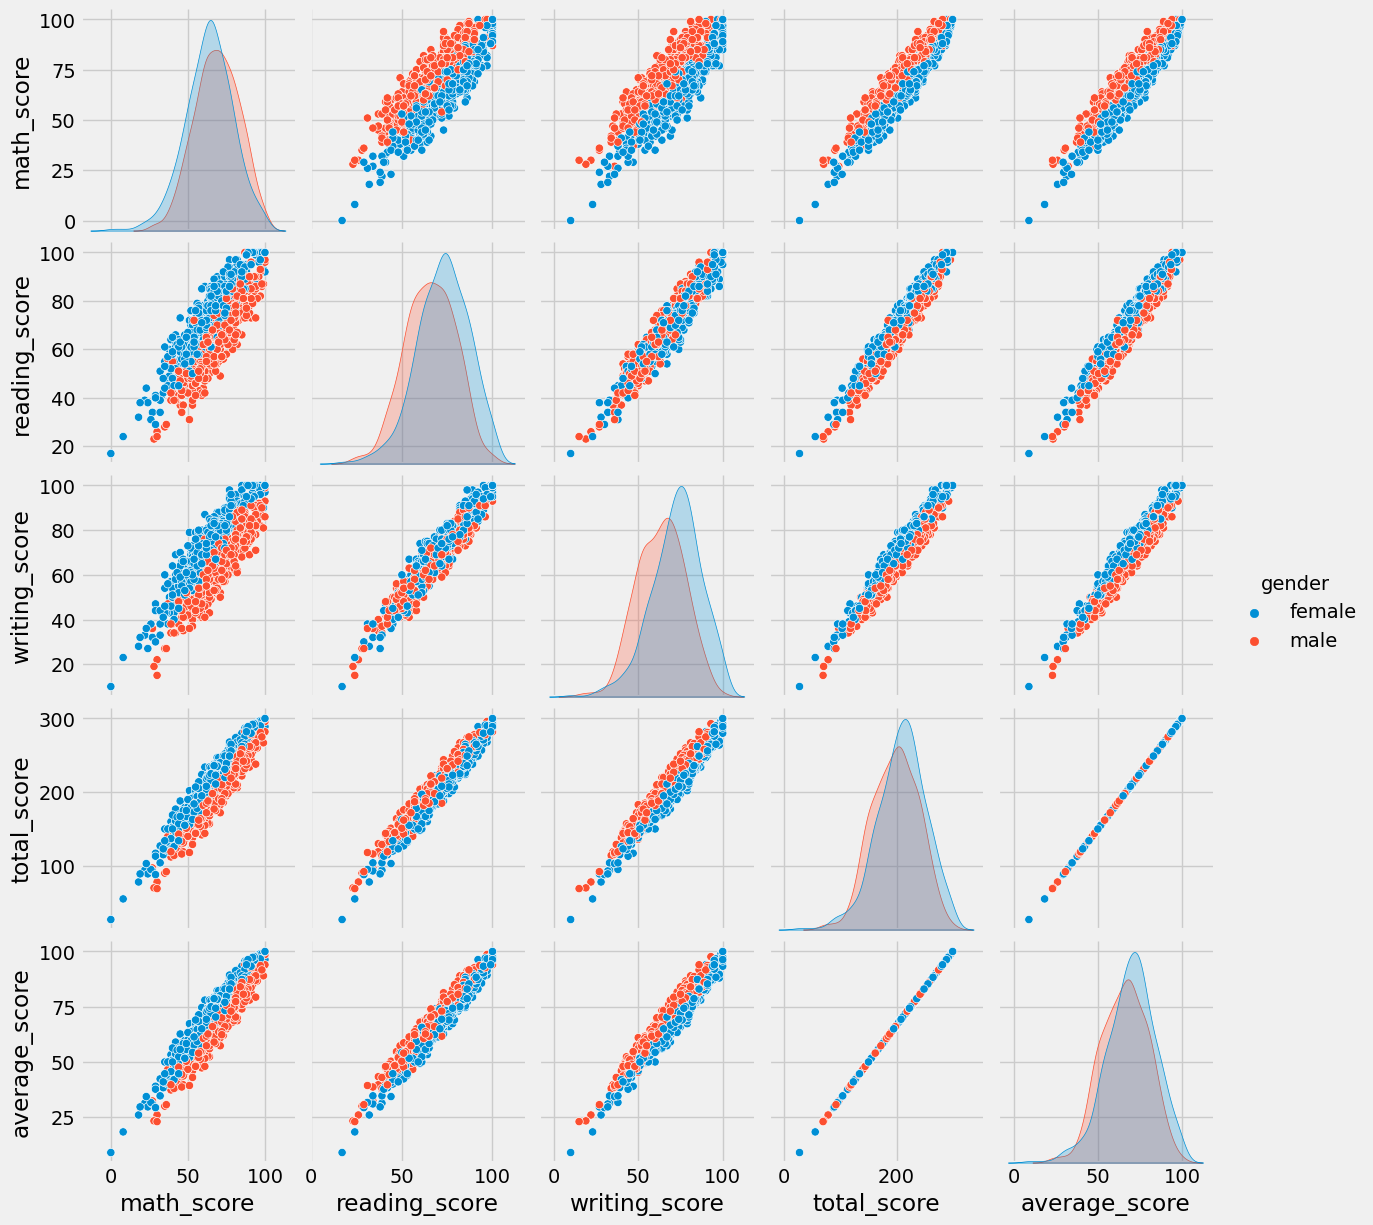

In [95]:
sns.pairplot(df, hue='gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.